<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/workbook_distributional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Welcome to Google Colab

**Jupyter-ноутбук — интерактивная среда разработки**

Свойства Jupyter

* работа в ячейках
  * мгновенное отображение результата работы фрагментов кода
  * можно разбить выполнение кода на части
  * ячейки можно запускать в произвольном порядке

* код и текст
  * Jupyter поддерживает 2 типа ячеек - текстовые и кодовые
  * всю вашу работу можно документировать в текстовых ячейках

* визуализация
  * табличных данных
  * графиков
  * \+ красивый вывод данных

* область применения
  * машинное обучение
  * дата саенс
  * большие данные
  * научные вычисления
  * документация

**Интерфейс Google Colab — разновидность Jupyter-ноутбука**

Основные отличия

* интеграция с внешними сервисами
  * GitHub (можно напрямую скачивать и загружать ноутбуки)
  * Google Drive (там можно хранить данные, модели; нужно подключить свой диск к ноутбуку)
  * NEW! генеративный ИИ может помочь вам с написанием кода

* аппаратный ускоритель
  * GPU / TPU используется для машинного обучения и других ресурсоёмких вычислений
  * бесплатный доступ / недорогая подписка
  * см. меню `Runtime` - `Change runtime type`

**Основы работы с интерфейсом Google Colab**

***Открыть файл***

Горячие клавиши: `Ctrl + O` или `Cmd + O`

Опции:

* загружаем файл *.ipynb с локального диска
* открываем файл *.ipynb с Google-диска
* открываем файл *.ipynb с GitHub (URL, поиск пользователя)
* открываем из GitHub с помощью кнопки `Open in Colab`

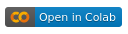

***Сохранить файл***

Горячие клавиши: сохранить на Google-диске `Ctrl + S` или `Cmd + S`

Возможности:

* сохранить копию в репозитории на GitHub (`File` - `Save a copy in GitHub`)
* сохранить GitHub Gist
* скачать *.ipynb (Jupyter-ноутбук)
* скачать *.py (скрипт на Python без деления на ячейки и текстовой информации)

***Внести изменения в файл***

Можно создать кодовую или текстовую ячейку.

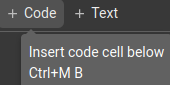

В кодовой ячейке можно ввести код на языке Python или команды shell.

Горячие клавиши:
- новая ячейка `Ctrl + M + B` или `Cmd + M + B`
- запустить ячейку `Shift + Enter`


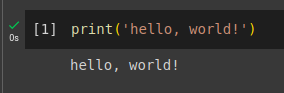

Ячейка содержит следующую информацию
- вывод данных
- время исполнения кода
- порядковый номер ячейки по ходу исполнения

In [ ]:
print('hello, world!')

hello, world!


Текстовые ячейки оформляются как Markdown.

См. [руководство по работе с Markdown](https://github.com/vifirsanova/compling/blob/main/markdown.md/).

Руководство можно использовать для оформления файла README.md в вашем репозитории на GitHub.

## Дистрибутивная семантика

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-19 15:23:59--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-01-19 15:23:59 (20.0 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [ ]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# токенизация по словам
tokens = word_tokenize(cleaned_text)

# выведем на экран несколько токенов
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['first',
 'citizen',
 'before',
 'we',
 'proceed',
 'any',
 'further',
 'hear',
 'me',
 'speak']

Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - если слово встречается реже, оно не попадает в нашу модель

`workers` - потоки (распараллеливание для ускорение работы)

In [ ]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# выведем результат обучения модели
model.wv['king']

array([ 3.0993388e-04,  2.4344164e-03, -1.4234134e-03,  3.3902135e-04,
       -5.0136447e-04, -1.6091732e-02,  3.2627941e-03,  2.2791972e-02,
       -1.1042583e-02, -1.7762078e-02, -3.6597378e-03, -1.5405690e-03,
       -9.7852349e-03,  1.2478584e-02,  2.5990354e-03, -7.2583784e-03,
       -4.4826027e-03, -1.3544309e-02,  2.0077960e-03,  3.9538628e-04,
       -1.4317234e-03, -5.3780270e-04,  4.8290375e-03, -1.4868095e-04,
        5.2706026e-03, -3.7946037e-03, -1.5596629e-04, -1.3292088e-02,
       -6.4670295e-03,  1.0294678e-02,  7.8338804e-03, -1.2208835e-02,
        2.7726702e-03, -1.1601759e-02, -5.0268029e-03,  1.0403274e-02,
       -9.2993993e-03,  3.2981781e-03,  7.1992739e-03, -1.4952275e-02,
       -8.3959708e-03, -8.6815543e-03, -1.3961735e-03,  1.2780608e-03,
        9.4627552e-03, -3.8420085e-03, -6.9499738e-03,  1.9297763e-03,
       -2.6639791e-03,  2.8018560e-04,  1.7777625e-03, -5.7056342e-05,
       -4.2708353e-03, -5.7700970e-03,  1.5772636e-03, -8.5923343e-04,
      

### **Задача 2.** Считаем сходство

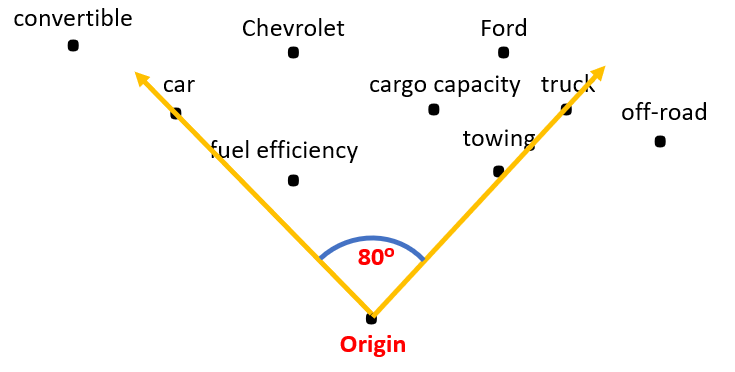

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [ ]:
model.wv.most_similar(["king"])

[('seen', 0.6131981015205383),
 ('youth', 0.6103989481925964),
 ('since', 0.6095167994499207),
 ('oer', 0.6086562871932983),
 ('merit', 0.6057994961738586),
 ('call', 0.6040176153182983),
 ('fathers', 0.599946141242981),
 ('best', 0.5997427701950073),
 ('custom', 0.5994468331336975),
 ('devise', 0.5908424258232117)]

In [ ]:
model.wv.similarity('king', 'queen')

-0.029355673

In [ ]:
model.wv.similarity('king', 'prince')

0.027135193

In [ ]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

### **Задача 3.** Визуализация

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# получить вектора
word_vectors = model.wv.vectors
words = model.wv.index_to_key

# сократить размерность векторов до 2D
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(word_vectors)

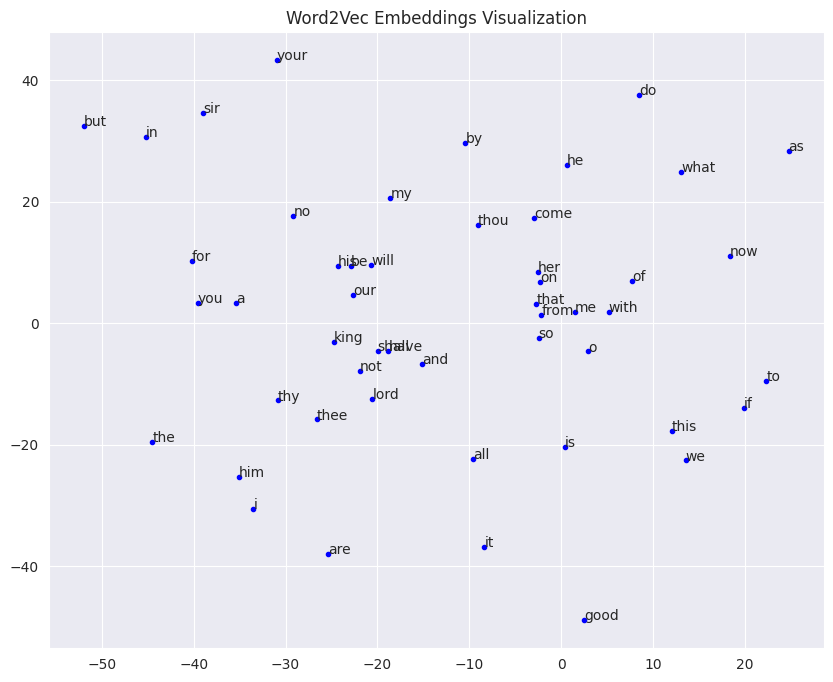

In [76]:
# выборка для отрисовки
vectors_2d_ = vectors_2d[10450:10500]

# отрисовка, параметры отрисовки
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d_[:, 0], vectors_2d_[:, 1], marker='.', color='b')

# аннотирование графика для интерпретации
for i, word in enumerate(words):
    try:
      plt.annotate(word, (vectors_2d_[i, 0], vectors_2d_[i, 1]))
    except IndexError:
      pass

plt.title("Word2Vec Embeddings Visualization")
plt.show()

## Домашнее задание